In [1]:
import os
import flopy
import numpy as np
import matplotlib.pyplot as plt
import flopy.utils.binaryfile as bf
#from ipywidgets import interact

In [2]:
model_ws = 'Results'
modelname = 'Session3'
exe_name = '/home/harsh/Desktop/modflow_flopy/flopyCourse/mf2005'
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws=model_ws)

In [3]:
nlay, nrow, ncol = 3, 21, 20
delr = delc = 500.
top = 400
botm = [220, 200, 0]
dis = flopy.modflow.ModflowDis(mf, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc, top=top, botm=botm)

In [4]:
bas = flopy.modflow.ModflowBas(mf, ibound=1, strt=320)

In [5]:
lpf = flopy.modflow.ModflowLpf(mf, hk=[50,0.01,200], vka=[10, 0.01, 20], laytyp=[1,0,0], ipakcb=53)

In [6]:
rch = flopy.modflow.ModflowRch(mf, rech=0.005)

In [7]:
# spd = {0: [[2, 10, 9, -150000]]}
#introducing more than one wells is easy
spd = {0: [[2, 10, 9, -150000], [2, 10, 4, -150000], [2, 10, 14, -150000]]}
wel = flopy.modflow.ModflowWel(mf, stress_period_data=spd)

[<AxesSubplot:title={'center':' WEL location stress period 1 layer 1'}>,
 <AxesSubplot:title={'center':' WEL location stress period 1 layer 2'}>,
 <AxesSubplot:title={'center':' WEL location stress period 1 layer 3'}>]

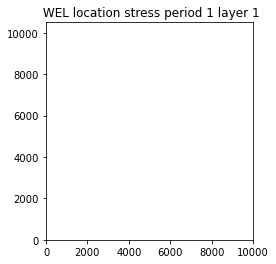

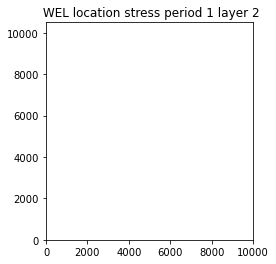

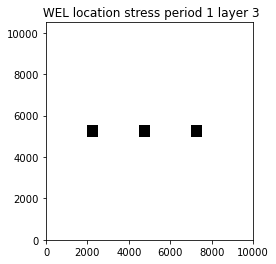

In [8]:
wel.plot()

In [9]:
spd_riv = {0: [[0, i, 19, 320, 1e5, 318] for i in range(nrow)]}
riv = flopy.modflow.ModflowRiv(mf, stress_period_data=spd_riv)

[<AxesSubplot:title={'center':' RIV location stress period 1 layer 1'}>,
 <AxesSubplot:title={'center':' RIV location stress period 1 layer 2'}>,
 <AxesSubplot:title={'center':' RIV location stress period 1 layer 3'}>]

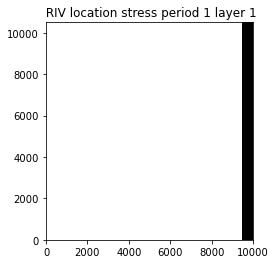

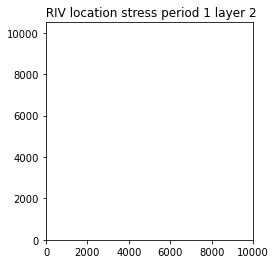

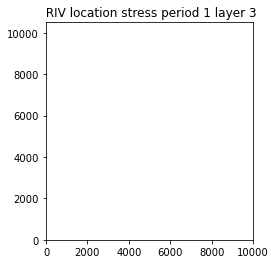

In [10]:
riv.plot()

In [11]:
spd = {(0,0): ['print head', 'print budget', 'save head', 'save budget']}
oc = flopy.modflow.ModflowOc(mf, stress_period_data=spd, compact=True)

In [12]:
pcg = flopy.modflow.ModflowPcg(mf)

In [13]:
mf.write_input()
mf.run_model()

FloPy is using the following  executable to run the model: /home/harsh/Desktop/modflow_flopy/flopyCourse/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: Session3.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2021/06/26 18:14:51

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2021/06/26 18:14:51
 Elapsed run time:  0.012 Seconds

  Normal termination of simulation


(True, [])

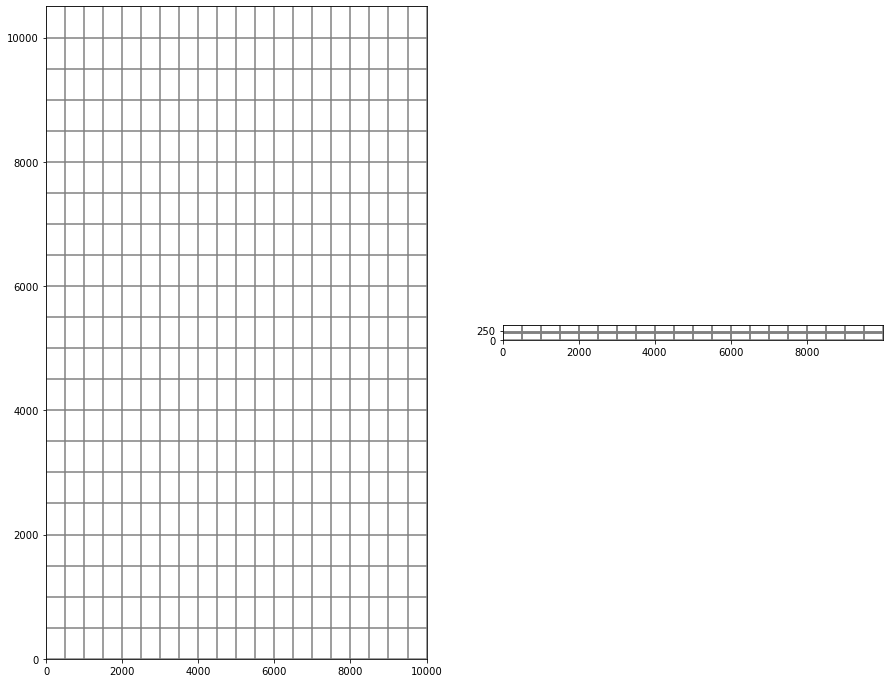

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,12))
mapview = flopy.plot.PlotMapView(model=mf)
linecollection = mapview.plot_grid(ax=ax1)
mapview.plot_ibound(ax=ax1)

xsect = flopy.plot.PlotCrossSection(model=mf, line={'Row':10})
linecollection = xsect.plot_grid(ax=ax2)

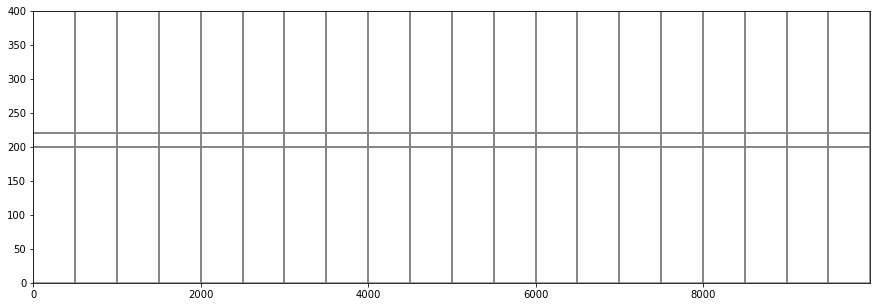

In [15]:
fig, ax1 = plt.subplots(figsize=(15,5))
xsect = flopy.plot.PlotCrossSection(model=mf, line={'Row':10}) #cross section for row or column
linecollection = xsect.plot_grid(ax=ax1)

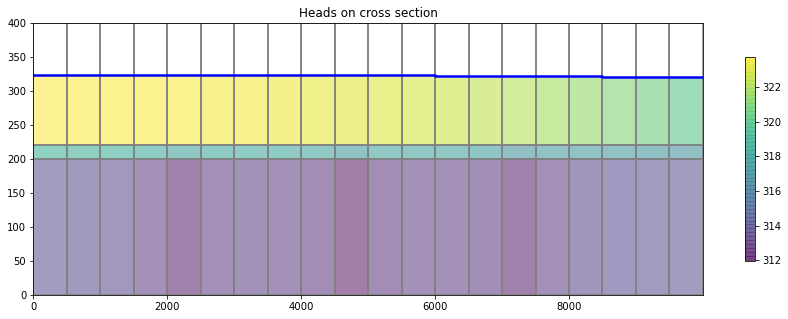

In [17]:
#import head
hds = bf.HeadFile(model_ws + '/' + modelname + '.hds')
head = hds.get_data(totim=1.0)

#plots
fig, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('Heads on cross section')
linecollection = xsect.plot_grid(ax=ax1)

#colorgrid
xsect = flopy.plot.PlotCrossSection(model=mf, line={'Row':10}) #cross section for row or column
pc = xsect.plot_array(head, masked_values=[999.], head=head, alpha=0.5)
cb = plt.colorbar(pc, shrink=0.75)

#watertable
wt = xsect.plot_surface(head[0], masked_values=[999.], color='blue', lw=2.5)

plt.savefig('three_well.png')


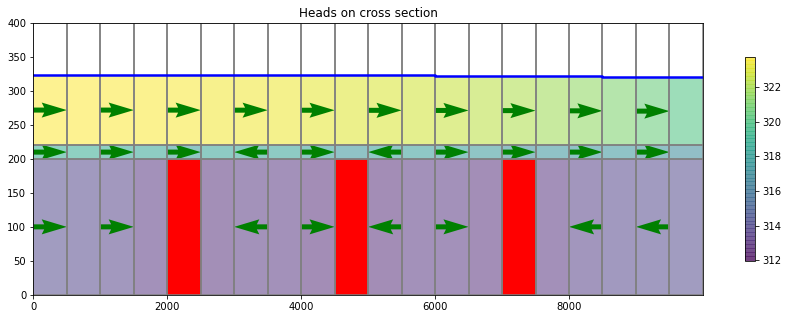

In [20]:
#import head
hds = bf.HeadFile(model_ws + '/' + modelname + '.hds')
head = hds.get_data(totim=1.0)

#import cbc
fname = os.path.join(model_ws, modelname+'.cbc')
cbb = flopy.utils.CellBudgetFile(fname)
frf = cbb.get_data(text='FLOW RIGHT FACE')[0]
fff = cbb.get_data(text='FLOW FRONT FACE')[0]

#plots
fig, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('Heads on cross section')
linecollection = xsect.plot_grid(ax=ax1)

#colorgrid
xsect = flopy.plot.PlotCrossSection(model=mf, line={'Row':10}) #cross section for row or column
pc = xsect.plot_array(head, masked_values=[999.], head=head, alpha=0.5)
cb = plt.colorbar(pc, shrink=0.75)

#quiver
quiver = xsect.plot_discharge(frf, fff, head=head, hstep=2, normalize=True, color='green',
                             scale=20)
xsect.plot_bc('wel')#plotting boundary conditions

#watertable
wt = xsect.plot_surface(head[0], masked_values=[999.], color='blue', lw=2.5)

# plt.savefig('three_well.png')